# Toolkit Example1: NetworkX To SIR 3S and SIR 3S to NetworkX via Toolkit

# Imports

In [1]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
import clr as net
net.AddReference(r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-04x64\Sir3S_Repository.Interfaces.dll") #Change to local path

In [3]:
import PythonWrapperToolkit
from PythonWrapperToolkit import SIR3S_Model, SIR3S_View
import Sir3S_Repository.Interfaces as Interfaces

# NetworkX

## Cretate edges connecting nodes

In [4]:
spnG = nx.Graph()

In [5]:
spnG.add_edge(1, 2, L=1000, D=150)
spnG.add_edge(2, 3, L=math.sqrt(2*math.pow(250,2)), D=100)
spnG.add_edge(2, 4, L=math.sqrt(2*math.pow(250,2)), D=100)
spnG.add_edge(3, 4, L=500, D=100)
spnG.add_edge(3, 5, L=math.sqrt(2*math.pow(250,2)), D=100)
spnG.add_edge(4, 5, L=math.sqrt(2*math.pow(250,2)), D=100)
spnG.add_edge(5, 6, L=1000, D=150)

## Set Node positions

In [6]:
pos = {
    1: (0, 1250),
    2: (1000, 1250),
    3: (1250, 1500),
    4: (1250, 1000),
    5: (1500, 1250),
    6: (2500, 1250),
}

In [7]:
for node, (x, y) in pos.items():
    nx.set_node_attributes(spnG, {node: x}, 'x')
    nx.set_node_attributes(spnG, {node: y}, 'y')
    nx.set_node_attributes(spnG, {node: 0}, 'z')

## Draw

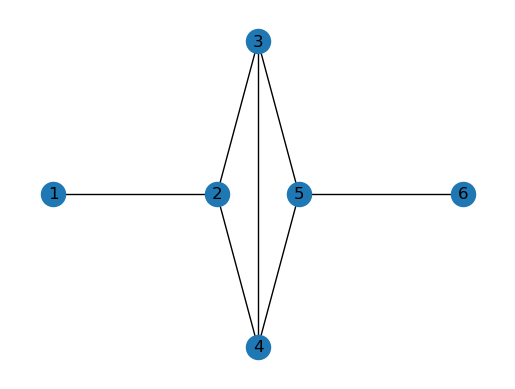

In [8]:
fig, ax = plt.subplots()
nx.draw(spnG, pos=pos, ax=ax)
nx.draw_networkx_labels(spnG, pos)
plt.show()

# Generate Toolkit Commands from NX Graph

In [9]:
def generate_toolkit_commands(graph, session_name="DefaultSession"):
    commands = [
        "import PythonWrapperToolkit",
        "import Sir3S_Repository.Interfaces as Interfaces",
        "instance = PythonWrapperToolkit.SIR3S_Model()",
        f"instance.StartTransaction(SessionName='{session_name}')"
    ]
    
    # Generate commands for nodes
    for node in graph.nodes(data=True):
        node_tk = node[0]
        x_coord = node[1]['x']
        y_coord = node[1]['y']
        z_coord = node[1]['z']
        
        # Create the command to insert the node
        insert_command = f"node{node_tk} = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)"
        commands.append(insert_command)
        
        # Create the commands to set the node's coordinates
        set_x_command = f"instance.SetValue(node{node_tk}, 'Xkor', '{x_coord}')"
        set_y_command = f"instance.SetValue(node{node_tk}, 'Ykor', '{y_coord}')"
        set_z_command = f"instance.SetValue(node{node_tk}, 'Zkor', '{z_coord}')"
        commands.append(set_x_command)
        commands.append(set_y_command)
        commands.append(set_z_command)
    
    # Generate commands for pipes
    for edge in graph.edges(data=True):
        node1, node2 = edge[0], edge[1]
        
        # Create the command to insert the pipe
        pipe_tk = f"pipe{node1}_{node2}"
        insert_pipe_command = f"{pipe_tk} = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Pipe)"
        commands.append(insert_pipe_command)
        
        # Create the command to connect the pipe with nodes
        connect_command = f"instance.ConnectConnectingElementWithNodes({pipe_tk}, node{node1}, node{node2})"
        commands.append(connect_command)
    
    # End the transaction
    commands.append("instance.EndTransaction()")
    
    return commands

In [10]:
commands = generate_toolkit_commands(spnG, session_name="DefaultSession")
for command in commands:
    print(command)

import PythonWrapperToolkit
import Sir3S_Repository.Interfaces as Interfaces
instance = PythonWrapperToolkit.SIR3S_Model()
instance.StartTransaction(SessionName='DefaultSession')
node1 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node1, 'Xkor', '0')
instance.SetValue(node1, 'Ykor', '1250')
instance.SetValue(node1, 'Zkor', '0')
node2 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node2, 'Xkor', '1000')
instance.SetValue(node2, 'Ykor', '1250')
instance.SetValue(node2, 'Zkor', '0')
node3 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node3, 'Xkor', '1250')
instance.SetValue(node3, 'Ykor', '1500')
instance.SetValue(node3, 'Zkor', '0')
node4 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node4, 'Xkor', '1250')
instance.SetValue(node4, 'Ykor', '1000')
instance.SetValue(node4, 'Zkor', '0')
node5 = instance.InsertElement(Eleme

# Testing with randomized graph

In [11]:
# Function to create a random graph on a 2500x2500 grid
def create_random_graph(num_nodes, num_edges):
    G = nx.Graph()
    for i in range(1, num_nodes + 1):
        x = random.randint(0, 2500)
        y = random.randint(0, 2500)
        G.add_node(i, x=x, y=y, z=0)
    
    for _ in range(num_edges):
        node1 = random.randint(1, num_nodes)
        node2 = random.randint(1, num_nodes)
        if node1 != node2:
            G.add_edge(node1, node2)
    
    return G

## Graph 1

In [12]:
graph1 = create_random_graph(30, 40) #numbe of nodes/edges

In [13]:
commands_graph1 = generate_toolkit_commands(graph1, session_name="Graph1Session")

In [14]:
print("Commands for Graph 1:")
for command in commands_graph1:
    print(command)

Commands for Graph 1:
import PythonWrapperToolkit
import Sir3S_Repository.Interfaces as Interfaces
instance = PythonWrapperToolkit.SIR3S_Model()
instance.StartTransaction(SessionName='Graph1Session')
node1 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node1, 'Xkor', '2422')
instance.SetValue(node1, 'Ykor', '546')
instance.SetValue(node1, 'Zkor', '0')
node2 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node2, 'Xkor', '1326')
instance.SetValue(node2, 'Ykor', '1616')
instance.SetValue(node2, 'Zkor', '0')
node3 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node3, 'Xkor', '998')
instance.SetValue(node3, 'Ykor', '2341')
instance.SetValue(node3, 'Zkor', '0')
node4 = instance.InsertElement(ElementType=Interfaces.Sir3SObjectTypes.Node)
instance.SetValue(node4, 'Xkor', '2043')
instance.SetValue(node4, 'Ykor', '701')
instance.SetValue(node4, 'Zkor', '0')
node5 = instanc

Feel free to execute the toolkit commands to recreate the graph in SIR 3S and compare it to the graph plotted below.

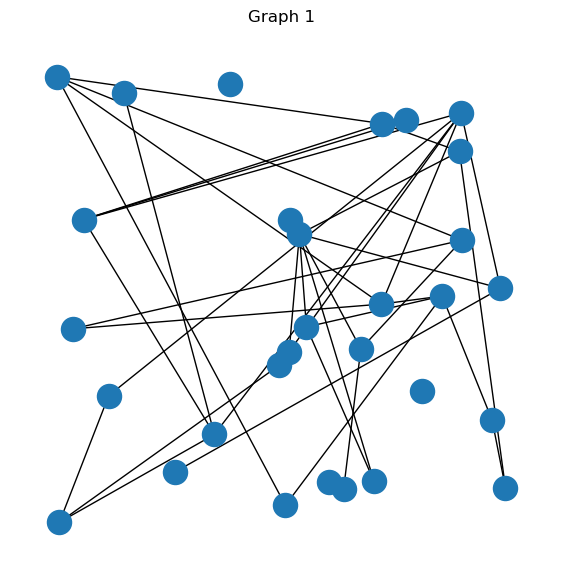

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
pos_graph1 = {node: (data['x'], data['y']) for node, data in graph1.nodes(data=True)}
nx.draw(graph1, pos=pos_graph1, ax=ax)
ax.set_title("Graph 1")
plt.show()

# Create NetworkX graph from SIR 3S Model

## Instance

In [16]:
instance = PythonWrapperToolkit.SIR3S_Model()

Initialization complete


In [17]:
instance.OpenModel(dbName=r"C:\Users\jablonski\3S\PT3S\Examples\Toolkit_Example1.db3", 
                   providerType=Interfaces.SirDBProviderType.SQLite, 
                   Mid="M-1-0-1",
                   saveCurrentlyOpenModel = True,
                   namedInstance="", 
                   userID="",
                   password="")

Model is open for further operation


In [18]:
node_tks = instance.GetTksofElementType(ElementType=Interfaces.Sir3SObjectTypes.Node)
pipe_tks = instance.GetTksofElementType(ElementType=Interfaces.Sir3SObjectTypes.Pipe)

In [19]:
nodes_data = []
pipes_data = []

In [20]:
# Retrieve node data
for node_tk in node_tks:
    x_coord, _ = instance.GetValue(node_tk, 'Xkor')
    y_coord, _ = instance.GetValue(node_tk, 'Ykor')
    node_name, _ = instance.GetValue(node_tk, 'Name')
    nodes_data.append({
        'node_tk': node_tk,
        'node_name': node_name,
        'x_coord': x_coord.replace(',', '.'),
        'y_coord': y_coord.replace(',', '.')
    })

In [21]:
# Retrieve pipe data
for pipe_tk in pipe_tks:
    from_node, _ = instance.GetValue(pipe_tk, 'FromNode.Name')
    to_node, _ = instance.GetValue(pipe_tk, 'ToNode.Name')
    pipes_data.append({
        'pipe_tk': pipe_tk,
        'from_node': from_node,
        'to_node': to_node
    })

In [22]:
nodes_df = pd.DataFrame(nodes_data)
pipes_df = pd.DataFrame(pipes_data)

In [23]:
# Filter out nodes with x < 700000 and y < 5000000
nodes_df['x_coord'] = nodes_df['x_coord'].astype(float)
nodes_df['y_coord'] = nodes_df['y_coord'].astype(float)
filtered_nodes_df = nodes_df[(nodes_df['x_coord'] >= 700000) & (nodes_df['y_coord'] >= 5000000)]

In [24]:
G = nx.Graph()

In [25]:
# Add nodes
for _, row in filtered_nodes_df.iterrows():
    G.add_node(row['node_tk'], x=row['x_coord'], y=row['y_coord'], z=0)

In [26]:
# Add edges (pipes) between nodes
for _, row in pipes_df.iterrows():
    from_node_name = row['from_node']
    to_node_name = row['to_node']
    from_node_tk = filtered_nodes_df[filtered_nodes_df['node_name'] == from_node_name]['node_tk'].values[0]
    to_node_tk = filtered_nodes_df[filtered_nodes_df['node_name'] == to_node_name]['node_tk'].values[0]
    if from_node_tk in G.nodes and to_node_tk in G.nodes:
        G.add_edge(from_node_tk, to_node_tk)

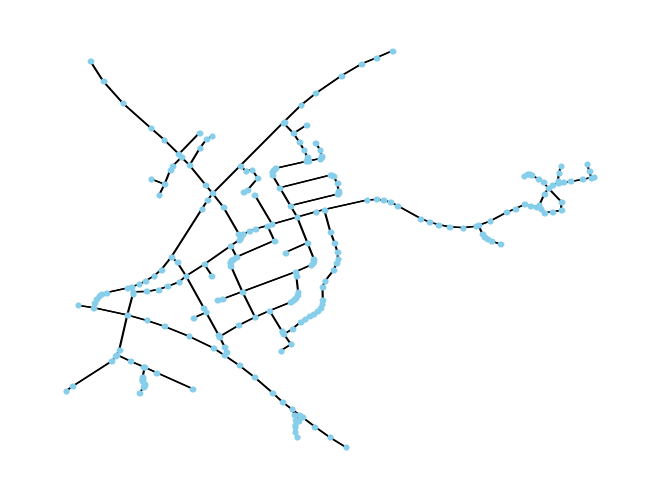

In [27]:
pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True) if 'x' in data and 'y' in data}
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

In [28]:
1/0

ZeroDivisionError: division by zero

In [ ]:
#print_graph_info(G)

In [ ]:
def print_graph_info(G):
    # Print basic information about the graph
    print("Graph Information:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Print nodes with their attributes
    print("\nNodes and their attributes:")
    for node, attrs in G.nodes(data=True):
        print(f"Node {node}: {attrs}")
    
    # Print edges with their attributes
    print("\nEdges and their attributes:")
    for edge in G.edges(data=True):
        print(f"Edge {edge[0]} -> {edge[1]}: {edge[2]}")

# NetworkX graph edit (unsure what to with it)

In [ ]:
spnG.nodes()

# n2i

In [ ]:
nodes_list = list(spnG.nodes())

In [ ]:
nodes_list

In [ ]:
nodes_list_opt=list(nx.utils.reverse_cuthill_mckee_ordering(spnG))

In [ ]:
nodes_list_opt

In [ ]:
n2i={}
for idx,u in enumerate(nodes_list_opt):
    n2i[u]=idx

In [ ]:
n2i

# L

In [ ]:
L=nx.laplacian_matrix(spnG, nodelist=nodes_list_opt)

In [ ]:
L.toarray()

In [ ]:
print(type(L))

# Useful Scripts to copy

In [ ]:
def wipe_elements(instance):
    # Get lists of node and pipe IDs
    node_tks = instance.GetTksofElementType(ElementType=Interfaces.Sir3SObjectTypes.Node)
    pipe_tks = instance.GetTksofElementType(ElementType=Interfaces.Sir3SObjectTypes.Pipe)
    
    # Delete all nodes
    for node_tk in node_tks:
        instance.DeleteElement(node_tk)
    
    # Delete all pipes
    for pipe_tk in pipe_tks:
        instance.DeleteElement(pipe_tk)

wipe_elements(instance)